<a href="https://colab.research.google.com/github/sammmc/Skyline-Math-200/blob/main/Python_Notebook_Setup_by_Sam_C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question # 1 : Is there an association between total amount of deceased siblings and cumulative household income. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ResearchPy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,




Codebook 1: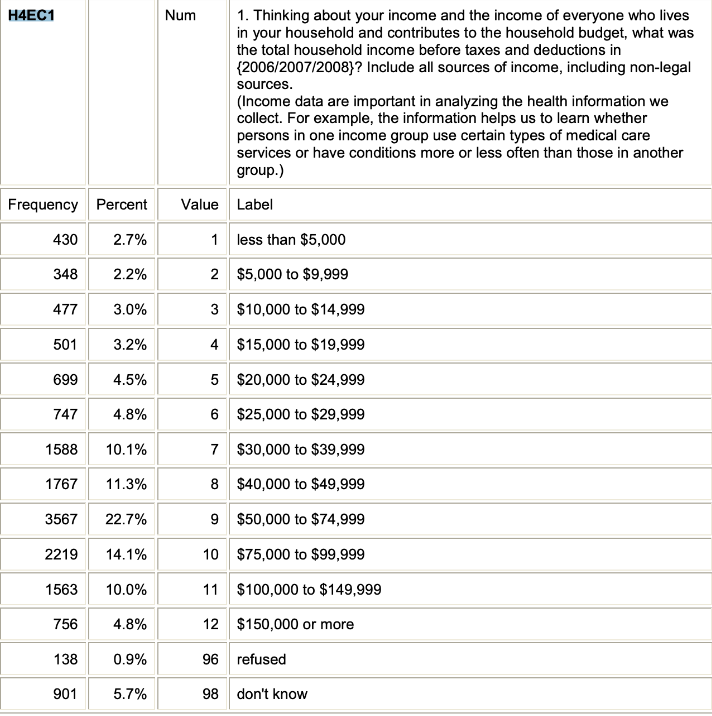

In [40]:
#Manage data for variable 1
df['H4EC1'].value_counts()
df['Household_Income'] = df['H4EC1']
df['Household_Income'].value_counts()
df['Household_Income'] = df['Household_Income'].loc[df['Household_Income'] !=' ']
df['Household_Income'] = df['Household_Income'].loc[df['Household_Income'] !='96']
df['Household_Income'] = df['Household_Income'].loc[df['Household_Income'] !='98']
df['Household_Income'].value_counts().sort_values()
df['Household_Income'].replace(['1','2','3','4','5','6','7','8','9','10','11','12'], ['less than $5,000','$5,000 to $9,999','$10,000 to $14,999','$15,000 to $19,999','$20,000 to $24,999','$25,000 to $29,999','$30,000 to $39,999','$40,000 to $49,999','$50,000 to $74,999','$75,000 to $99,999','$100,000 to $149,999','$150,000 or more'], inplace=True)
df['Household_Income'].value_counts()


$50,000 to $74,999      1154
$75,000 to $99,999       698
$40,000 to $49,999       578
$30,000 to $39,999       505
$100,000 to $149,999     476
$25,000 to $29,999       269
$150,000 or more         247
$20,000 to $24,999       237
$10,000 to $14,999       173
$15,000 to $19,999       167
less than $5,000         137
$5,000 to $9,999         120
Name: Household_Income, dtype: int64

In [41]:
print(rp.summary_cat(df['Household_Income']))

            Variable               Outcome  Count  Percent
0   Household_Income    $50,000 to $74,999   1154    24.24
1                       $75,000 to $99,999    698    14.66
2                       $40,000 to $49,999    578    12.14
3                       $30,000 to $39,999    505    10.61
4                     $100,000 to $149,999    476    10.00
5                       $25,000 to $29,999    269     5.65
6                         $150,000 or more    247     5.19
7                       $20,000 to $24,999    237     4.98
8                       $10,000 to $14,999    173     3.63
9                       $15,000 to $19,999    167     3.51
10                        less than $5,000    137     2.88
11                        $5,000 to $9,999    120     2.52


<Axes: title={'center': 'Average Household Income'}>

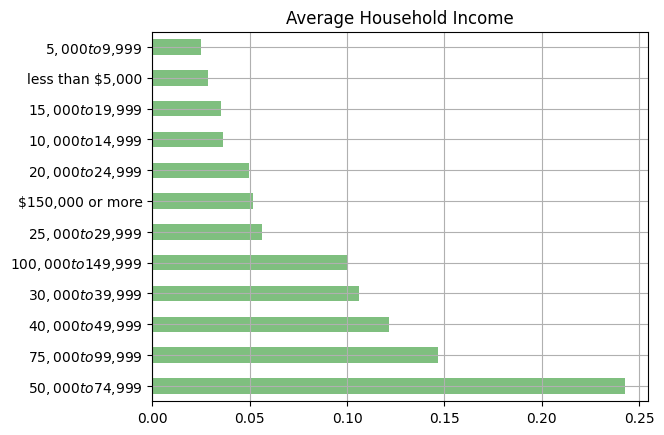

In [42]:
#Graphs and tables or statistics
df = df.sort_values('Household_Income')
plt.title('Average Household Income')
df['Household_Income'].value_counts(normalize=True).plot(kind='barh', color='green', width= 0.5, alpha = 0.5, grid=True)

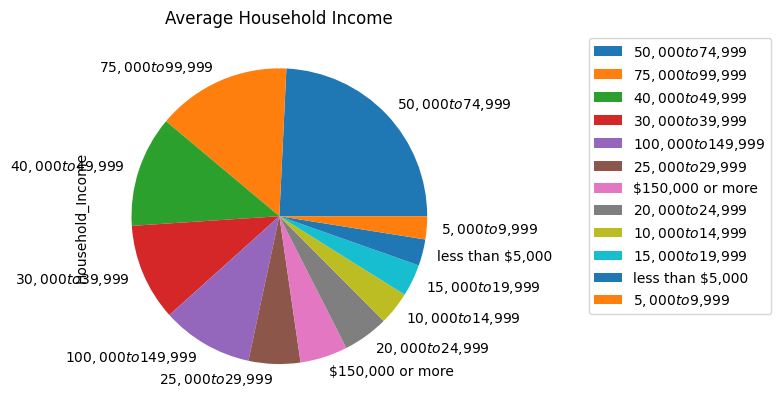

In [43]:
plt.title('Average Household Income')
df['Household_Income'].value_counts(normalize=True).plot(kind='pie')
plt.legend( loc='upper right', bbox_to_anchor=(1.85, 1))

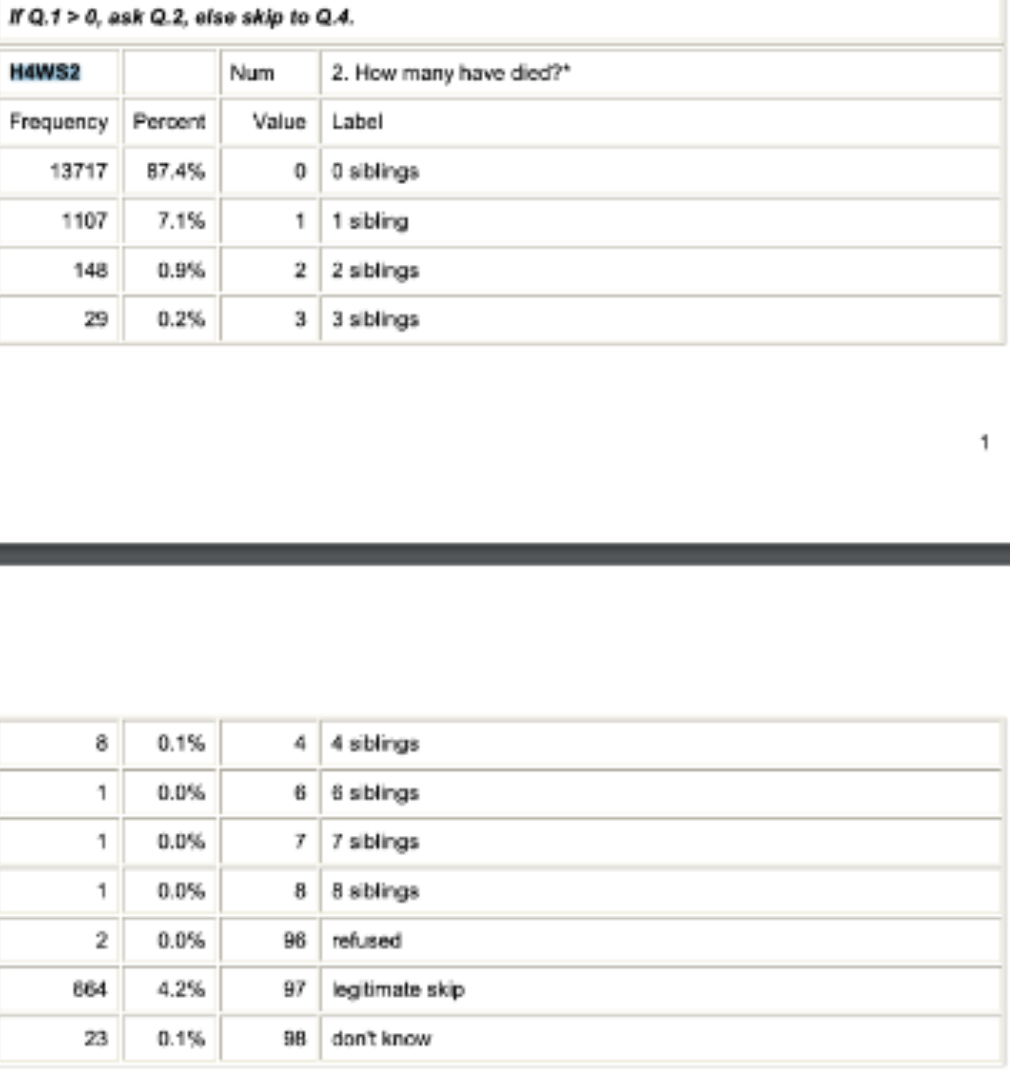Codebook 2:

In [32]:
#Manage data for variable 1
df['Deceased_siblings']=df['H4WS2']
df['Deceased_siblings'].dtype
df['Deceased_siblings'] = pd.to_numeric(df['Deceased_siblings'], errors= 'coerce')
df['Deceased_siblings'].dtype
df['Deceased_siblings'].value_counts()
df['Deceased_siblings'] = df['Deceased_siblings'].loc[df['Deceased_siblings'] !='96']
df['Deceased_siblings'] = df['Deceased_siblings'].loc[df['Deceased_siblings'] !='68']
df['Deceased_siblings'].value_counts()


0.0     4441
1.0      358
97.0     253
2.0       45
3.0        9
98.0       5
4.0        1
8.0        1
96.0       1
Name: Deceased_siblings, dtype: int64

In [38]:
#Graphs and tables or statistics
print(df['Deceased_siblings'].describe())

print(rp.summarize(df['Deceased_siblings']))

print(rp.summary_cont(df['Deceased_siblings']))

count    5114.000000
mean        5.008604
std        21.255901
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        98.000000
Name: Deceased_siblings, dtype: float64
                Name     N    Mean Median  Variance       SD      SE  \
0  Deceased_siblings  5114  5.0086    0.0  451.8133  21.2559  0.2972   

  95% Conf. Interval  
0   [4.4259, 5.5913]  


            Variable       N    Mean       SD      SE  95% Conf.  Interval
0  Deceased_siblings  5114.0  5.0086  21.2559  0.2972     4.4259    5.5913


<Axes: xlabel='Deceased_siblings', ylabel='Count'>

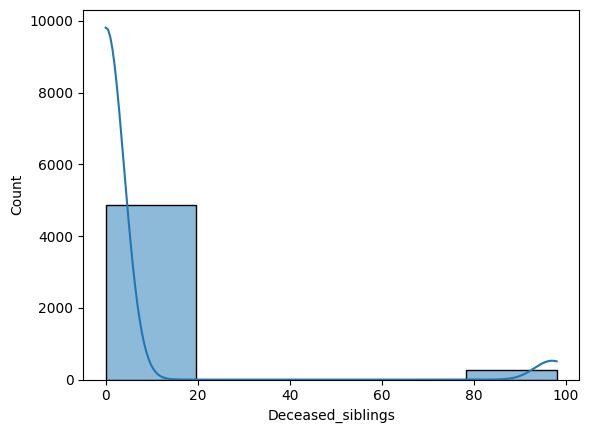

In [31]:
sns.histplot(x='Deceased_siblings', data= df, kde=True, bins=5)

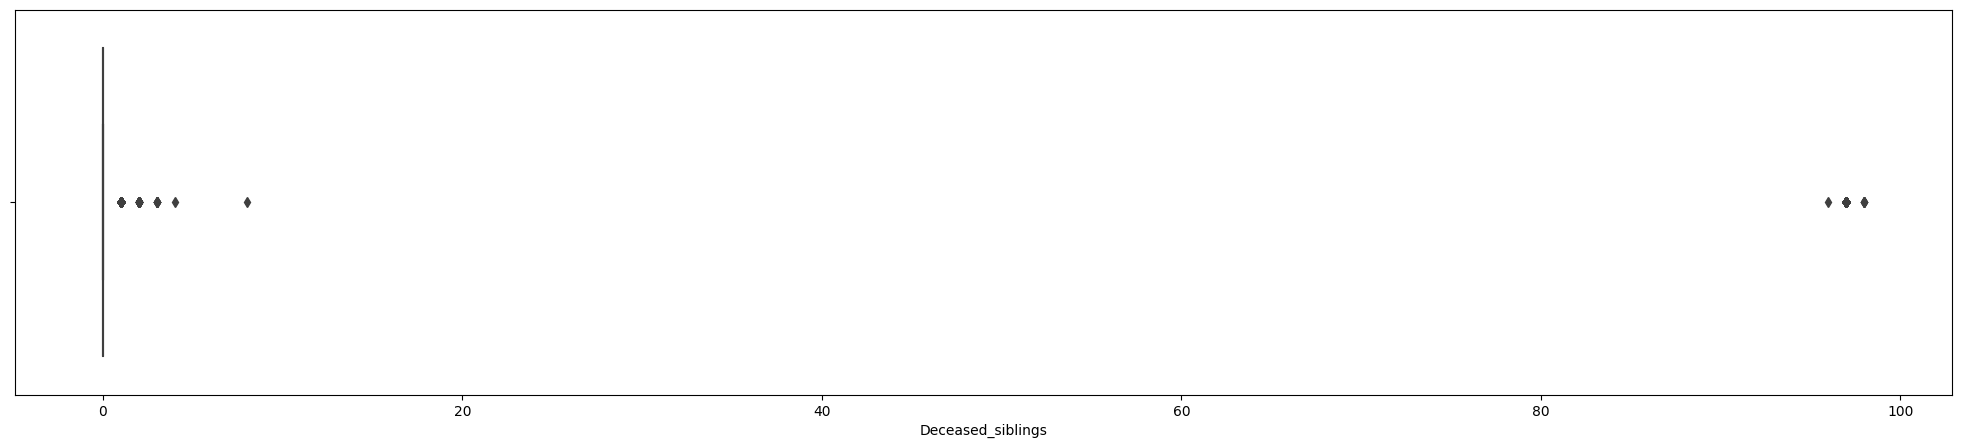

In [34]:
sns.boxplot(x='Deceased_siblings', data=df).figure.set_size_inches(25, 5)